# Doctor Type ML Models - Linear & Quadratic Discriminant Analysis
Amy Jin

7/3/2018, py27 

### 5.2.7 Discriminant Analysis

In STEP20, logistic regression has been tried, and it is a classification algorithm traditionally limited to only two-class classification problems (i.e. default = Yes or No). However, if we have more than two classes then Linear (and its cousin Quadratic) Discriminant Analysis (LDA & QDA) is an often-preferred classification technique. Discriminant analysis models the distribution of the predictors X separately in each of the response classes (i.e. default = “Yes”, default = “No” ), and then uses Bayes’ theorem to flip these around into estimates for the probability of the response category given the value of X.

Here is a great lecture on LDA/QDA: https://web.stanford.edu/class/stats202/content/lec9.pdf http://www.personal.psu.edu/jol2/course/stat597e/notes2/lda.pdf

#### Why Discriminant Analysis?

There are several reasons:

* When the classes of the reponse variable Y (i.e. default = “Yes”, default = “No”) are well-separated, the parameter estimates for the logistic regression model are surprisingly unstable. LDA & QDA do not suffer from this problem.
* If n is small and the distribution of the predictors X is approximately normal in each of the classes, the LDA & QDA models are again more stable than the logistic regression model.
* LDA & QDA are often preferred over logistic regression when we have more than two non-ordinal response classes (i.e.: stroke, drug overdose, and epileptic seizure).
* It is always good to compare the results of different analytic techniques; this can either help to confirm results or highlight how different modeling assumptions and characterstics uncover new insights.

#### Assumptions

LDA & QDA have assumptions that are often more restrictive then logistic regression:

* Both LDA and QDA assume the the predictor variables X are drawn from a multivariate Gaussian (aka normal) distribution.
* LDA assumes equality of covariances among the predictor variables X across each all levels of Y. This assumption is relaxed with the QDA model.
* LDA and QDA require the number of predictor variables (p) to be less then the sample size (n). Furthermore, its important to keep in mind that performance will severely decline as p approaches n. A simple rule of thumb is to use LDA & QDA on data sets where n>=5*p 

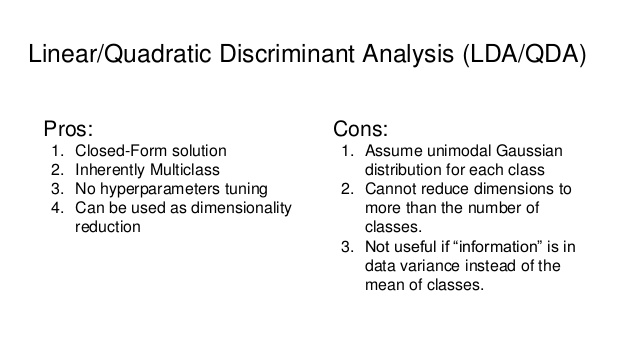

In [15]:
from IPython.display import Image
Image(filename='DA_pros_cons.jpg')

#### Comparing Logistic Regression & Discriminant Analysis

The logistic regression and LDA methods are closely connected and differ primarily in their fitting procedures. Consequently, the two often produce similar results. However, LDA assumes that the observations are drawn from a Gaussian distribution with a common covariance matrix across each class of Y, and so can provide some improvements over logistic regression when this assumption approximately holds. Conversely, logistic regression can outperform LDA if these Gaussian assumptions are not met. Both LDA and logistic regression produce linear decision boundaries so when the true decision boundaries are linear, then the LDA and logistic regression approaches will tend to perform well. QDA, on the other-hand, provides a non-linear quadratic decision boundary. Thus, when the decision boundary is moderately non-linear, QDA may give better results.

#### Comparing LDA & QDA

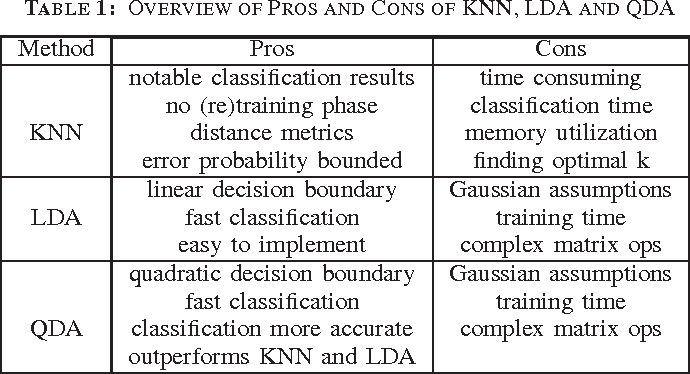

In [13]:
from IPython.display import Image
Image(filename='lda_qda.png')

#### Which is better? LDA or QDA?

Since QDA allows for different variances among classes, the resulting boundaries become quadratic. 

* QDA will work best when the variances are very ***different*** between classes and we have ***enough/very-large*** observations to accurately estimate the variances.

* LDA will work best when the variances are ***similar*** among classes or we ***don't have enough*** data to accurately estimate the variances.

Also, when considering between LDA & QDA its important to know that LDA is a much less flexible classifier than QDA, and so has substantially lower variance. This can potentially lead to improved prediction performance. But there is a trade-off: if LDA’s assumption that the the predictor variable share a common variance across each Y response class is badly off, then LDA can suffer from high bias. Roughly speaking, LDA tends to be a better bet than QDA if there are relatively few training observations and so reducing variance is crucial. In contrast, QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a common covariance matrix is clearly untenable.

In [2]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")
train, test = train_test_split(data, test_size=0.2, random_state = 100)
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]

### 1) Linear Discriminant Analysis

In [3]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

print(model_lda.priors_)

[0.99680767 0.00319233]


The LDA output indicates prior probabilities of  $\hat \pi_1$ 1=0.99680767  and  $\hat \pi_2$=0.00319233 ; in other words, 99.680767% of the training observations correspond to doctor type 0.

In [4]:
print(model_lda.means_)

[[0.00111581 0.00063225 0.00020042 0.01473664 0.03273495 0.0008087
  0.00112255 0.00075012 0.00024958 0.00488249]
 [0.04560493 0.03642652 0.01158405 0.10800714 0.01111447 0.03677536
  0.02671745 0.01950964 0.00374948 0.00228804]]


The above provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of  $\mu_k$ . These suggest that there is a tendency that class 0 and class 1 have vlaues in some of the features.

In [5]:
print(model_lda.coef_)

[[ 92.45906372 182.95621568 186.57663307   1.32360741  -3.12622159
   21.57263139  22.2203809   32.14646118 -13.73681905  -0.77854962]]


The coefficients of linear discriminants output provides the linear combination of X1 to X10 that are used to form the LDA decision rule.

If  $\sum_1^{10} X_i*coef_i$  is large, then the LDA classifier will predict class 0, and if it is small, then the LDA classifier will predict class 1. 

In [8]:
y_pred=model_lda.predict(X_test)

[[36786   299]
 [   74    40]]
Accuracy of LDA classifier on test set: 0.9899728487324928
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     37085
          1       0.12      0.35      0.18       114

avg / total       1.00      0.99      0.99     37199



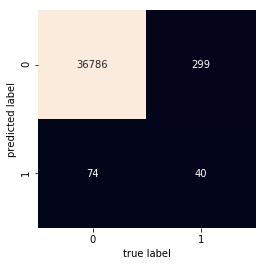

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of LDA classifier on test set: {:.16f}'.format(model_lda.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

### 2) Quadratic Discriminant Analysis

Now let's perform QDA and see how it performs.

In [10]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)
print(model_qda.priors_)
print(model_qda.means_)

[0.99680767 0.00319233]
[[0.00111581 0.00063225 0.00020042 0.01473664 0.03273495 0.0008087
  0.00112255 0.00075012 0.00024958 0.00488249]
 [0.04560493 0.03642652 0.01158405 0.10800714 0.01111447 0.03677536
  0.02671745 0.01950964 0.00374948 0.00228804]]


The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [11]:
y_pred2=model_qda.predict(X_test)

[[36453   632]
 [   73    41]]
Accuracy of LDA classifier on test set: 0.9810478776311191
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     37085
          1       0.06      0.36      0.10       114

avg / total       1.00      0.98      0.99     37199



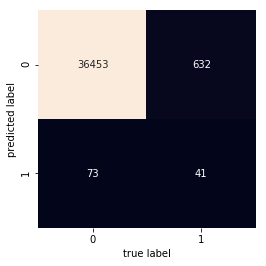

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of QDA classifier on test set: {:.16f}'.format(model_qda.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

Reference: http://uc-r.github.io/discriminant_analysis